In [1]:
import warnings
warnings.filterwarnings('ignore')

import leabra7 as lb
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create the network
net = lb.Net()

# Log internal dynamics for each layer
layer_spec = lb.LayerSpec(
    log_on_cycle=("unit_v_m", "unit_act", "unit_i_net", "unit_net", 
                  "unit_gc_i", "unit_adapt", "unit_spike"))

# Instantiate the network
net.new_layer(name="input", size=1, spec=layer_spec)
net.new_layer(name="output", size=1, spec=layer_spec)
net.new_projn(name="proj1", pre="input", post="output")

# Activate the input layer
net.clamp_layer(name="input", acts=[1])

In [3]:
# Cycle the network
for i in range(250):
    net.cycle()

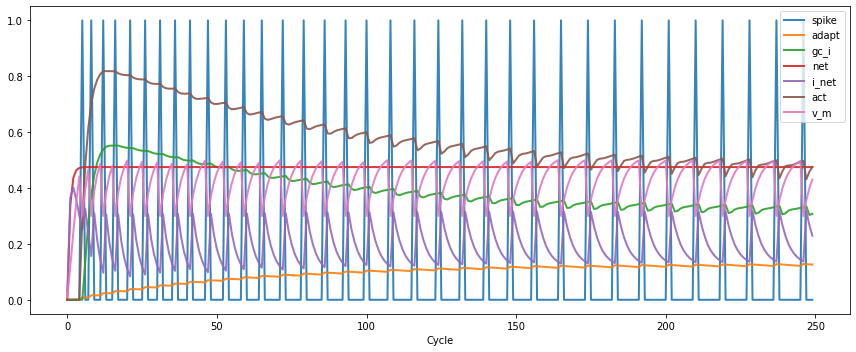

In [5]:
# Retrieve logs
wholeLog, partLog = net.logs(freq="cycle", name="output")
partLog = partLog.drop(columns="unit")

# Plot the logs
ax = partLog.plot(x="time", figsize=(12,5), linewidth=2, alpha=0.9)
ax.set_xlabel("Cycle")
ax.legend(loc="upper right")
ax.figure.tight_layout()
ax.figure.savefig("two_neurons.png", dpi=300)
ax.figure.show()